In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils
import random as rng

In [2]:
frame = cv2.imread("ball.png")
# frame = cv2.imread("marker.png")
#frame = cv2.imread("gray_ball.png")
blurred = cv2.GaussianBlur(frame, (5, 5), 3)
hsl_and_blurred = cv2.cvtColor(blurred, cv2.COLOR_BGR2HLS)

In [3]:
light_channel = np.array(hsl_and_blurred[::1])
max_light = light_channel.max()
obj_light = 0.6
light_border_value = int(max_light*obj_light)

In [4]:
saturation_channel = np.array(hsl_and_blurred[:1:])
max_saturation = saturation_channel.max()
obj_saturation = 0.1
saturation_border_value = int(max_saturation*obj_saturation)

In [5]:

upper_white = np.array([255, 255, 255])
lower_white = np.array([0, light_border_value, saturation_border_value])
mask = cv2.inRange(hsl_and_blurred, lower_white, upper_white)
mask = cv2.dilate(mask, None, iterations=10)
mask = cv2.erode(mask, None, iterations=10)

In [6]:
contours = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
bounding_rectangles = []
biggest_rectangle = 0
max_area = 0
for contour in contours:
    approx_contour = cv2.approxPolyDP(contour, 15, True)
    bounding_rectangles.append(cv2.boundingRect(approx_contour))
    
    area = bounding_rectangles[-1][2] * bounding_rectangles[-1][3]
    if area > max_area:
        biggest_rectangle = bounding_rectangles[-1]
        max_area = area
    

In [7]:
drawing = frame

rng.seed(12345)

for i in range(len(contours)):
    color = (160, 32, 240)
    cv2.rectangle(drawing, (int(bounding_rectangles[i][0]), int(bounding_rectangles[i][1])), \
      (int(bounding_rectangles[i][0]+bounding_rectangles[i][2]), int(bounding_rectangles[i][1]+bounding_rectangles[i][3])), color, 20)

Text(0.5, 1.0, 'Final')

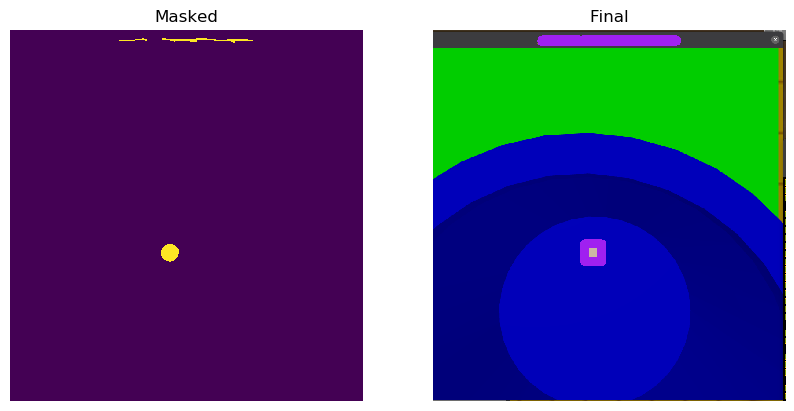

In [8]:
fig = plt.figure(figsize=(10, 7))
rows = 1
cols = 2

fig.add_subplot(rows, cols, 1)
plt.imshow(mask)
plt.axis('off')
plt.title("Masked")

fig.add_subplot(rows, cols, 2)
plt.imshow(drawing)
plt.axis('off')
plt.title("Final")